<a href="https://colab.research.google.com/github/Nielspace/Deep-Learning-with-GAN/blob/master/01%20With%20the%20basics/01_Learning_Keras_with_Cifar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.layers import Input, Flatten, Dense, Conv2D
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.models import Model

from keras.datasets import cifar10

Using TensorFlow backend.


In [0]:
NUM_CLASS = 10

# Loading the dataset

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [8]:
print('the shape of X_train : ', X_train.shape)
print('the shape of y_train : ', y_train.shape)
print('the shape of X_test : ', X_test.shape)
print('the shape of y_test : ', y_test.shape)

the shape of X_train :  (50000, 32, 32, 3)
the shape of y_train :  (50000, 1)
the shape of X_test :  (10000, 32, 32, 3)
the shape of y_test :  (10000, 1)


# Normalizing

In [0]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

y_train_cat = to_categorical(y_train, NUM_CLASS)
y_test_cat = to_categorical(y_test, NUM_CLASS)

In [10]:
y_train_cat.shape

(50000, 10)

In [11]:
X_train[54, 12, 13, 1]

0.36862746

# Architecture

In [12]:
input_layer = Input((32,32,3))

X = Flatten()(input_layer)
X = Dense(200, activation='relu')(X)
X = Dense(150, activation = 'relu')(X)

output_layer = Dense(NUM_CLASS, activation='softmax')(X)

model = Model(input_layer, output_layer)

In [13]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               614600    
_________________________________________________________________
dense_2 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


# Compiling

In [14]:
opt = Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training the model

In [20]:
model.fit(X_train, y_train_cat,
          batch_size = 32, 
          epochs = 10, 
          shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/10
50000/50000 [==============================] - 14s 278us/step - loss: 1.8501 - acc: 0.3316
Epoch 2/10
50000/50000 [==============================] - 10s 199us/step - loss: 1.6682 - acc: 0.4020
Epoch 3/10
50000/50000 [==============================] - 10s 194us/step - loss: 1.5896 - acc: 0.4304
Epoch 4/10
50000/50000 [==============================] - 10s 192us/step - loss: 1.5392 - acc: 0.4485
Epoch 5/10
50000/50000 [==============================] - 10s 191us/step - loss: 1.5019 - acc: 0.4640
Epoch 6/10
50000/50000 [==============================] - 9s 190us/step - loss: 1.4688 - acc: 0.4747
Epoch 7/10
50000/50000 [==============================] - 10s 192us/step - loss: 1.4384 - acc: 0.4865
Epoch 8/10
50000/50000 [==============================] - 10s 192us/step - loss: 1.4220 - acc: 0.4916
Epoch 9/10
50000/50000 [==============================] - 10s 193us/step - loss: 1.3994 - 

# Analysing and Predicting the model

In [21]:
model.evaluate(X_test, y_test_cat)

10000/10000 [==============================] - 1s 80us/step


[1.4566470344543456, 0.4885]

In [0]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

In [0]:
preds = model.predict(X_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test_cat, axis = -1)]

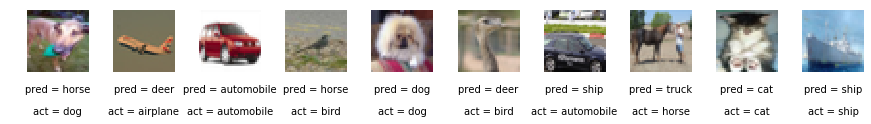

In [28]:
n_to_show = 10
indices = np.random.choice(range(len(X_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = X_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)